In [8]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Get Review Distributions

In [2]:
def get_wordtotals(data_dir):
    
    def extract_tots(file):
        words, num_words = 0,0
        for line in file:
            words = line.split()
            num_words += len(words)
            return num_words
    
    pos_files = os.listdir(os.path.join(data_dir, 'pos'))
    neg_files = os.listdir(os.path.join(data_dir, 'neg'))
        
    data = []
    for pos_file, neg_file in zip(pos_files, neg_files):
        with open(os.path.join(data_dir, 'pos', pos_file)) as f:   
            data.append((extract_tots(f), 1))
        with open(os.path.join(data_dir, 'neg', neg_file)) as f:
            data.append((extract_tots(f), 0))
    
    return data

In [5]:
dir_train = '/home/eugenet/final_project/data/aclImdb/train/'
dir_test  = '/home/eugenet/final_project/data/aclImdb/test/'

word_totals_train = pd.DataFrame(get_wordtotals(dir_train), columns=['words','pos'])
word_totals_train['type'] = 'train'
word_totals_test = pd.DataFrame(get_wordtotals(dir_test), columns=['words','pos'])
word_totals_test['type'] = 'test'

In [11]:
word_totals_train.head()

,words,pos,type
0,129,1,train
1,145,0,train
2,100,1,train
3,485,0,train
4,68,1,train


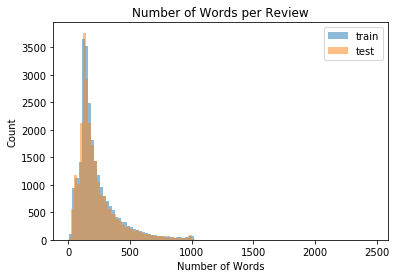

In [14]:
plt.hist(word_totals_train['words'], 100, alpha=0.5, label='train')
plt.hist(word_totals_test['words'], 100, alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Number of Words per Review')
plt.show()

# Get Top Reviews

In [15]:
from collections import Counter
def get_top_words(data_dir):
    
    c_pos = Counter()
    c_neg = Counter()
    def count_words(file, c):
        for line in file:
            words = line.split()
            for word in words:
                c[word] += 1
    
    pos_files = os.listdir(os.path.join(data_dir, 'pos'))
    neg_files = os.listdir(os.path.join(data_dir, 'neg'))
        
    for pos_file, neg_file in zip(pos_files, neg_files):
        with open(os.path.join(data_dir, 'pos', pos_file)) as f:   
            count_words(f, c_pos)
        with open(os.path.join(data_dir, 'neg', neg_file)) as f:
            count_words(f, c_neg)
    
    return c_pos, c_neg

In [17]:
c_pos, c_neg = get_top_words(dir_train)

In [29]:
diff_percent_pos = {}
for word, pos_count in c_pos.most_common(n=1000):
    neg_count = c_neg[word]
    diff_percent_pos[word] = (pos_count - neg_count)/pos_count

In [42]:
diff_percent_neg = {}
for word, neg_count in c_neg.most_common(n=1000):
    pos_count = c_pos[word]
    diff_percent_neg[word] = (pos_count - neg_count)/neg_count

In [45]:
diff_pos = list(diff_percent_pos.items())
diff_pos.sort(key=lambda x: abs(x[1]), reverse=True)
for word, percent_difference in diff_pos:
    print(word, percent_difference, c_pos[word], c_neg[word])

supposed -2.6160990712074303 323 1168
bad -2.6141843971631205 1410 5096
poor -2.4012158054711246 329 1119
minutes -1.6186291739894552 569 1490
decent -1.4875444839857652 281 699
money -1.4696969696969697 462 1141
attempt -1.40625 288 693
nothing -1.3597194388777556 998 2355
couldn't -1.2247191011235956 445 990
low -1.1320224719101124 356 759
hour -1.1291512915129152 271 577
script -1.1288888888888888 675 1437
acting, -1.0771929824561404 285 592
guess -1.014367816091954 348 701
lack -0.9882352941176471 340 676
guy -0.9875690607734806 724 1439
looked -0.9847560975609756 328 651
2 -0.9570815450643777 466 912
budget -0.9526462395543176 359 701
reason -0.9368770764119602 602 1166
instead -0.9336384439359268 437 845
How -0.884180790960452 354 667
wouldn't -0.855072463768116 345 640
least -0.8547544409613375 957 1775
beautifully 0.8466666666666667 300 46
mean -0.8405063291139241 395 727
Then -0.8064516129032258 341 616
obviously -0.8036253776435045 331 597
except -0.8033333333333333 300 541
t

past 0.27606177606177607 518 375
boy 0.27552986512524086 519 376
huge -0.2749326145552561 371 473
like -0.2728754073702682 7978 10155
With 0.27256317689530685 554 403
side 0.27235772357723576 492 358
quite 0.2714493456131847 2063 1503
Tom 0.27113702623906705 343 250
He 0.27100271002710025 2583 1883
/>A 0.2707317073170732 410 299
although 0.2697986577181208 745 544
and, 0.26898047722342733 461 337
style 0.2685025817555938 581 425
able 0.26732673267326734 707 518
group -0.2653061224489796 392 496
manages 0.26426426426426425 333 245
it.<br -0.2641509433962264 371 469
moments 0.2632398753894081 642 473
number 0.2631578947368421 513 378
were -0.26260004326195113 4623 5837
slow -0.2625 320 404
nice 0.262208067940552 942 695
too -0.2621548035783742 2571 3245
day 0.26193548387096777 775 572
ten -0.26022304832713755 269 339
features 0.25878594249201275 313 232
similar 0.2585034013605442 441 327
him. 0.2570093457943925 642 477
soon 0.25646123260437376 503 374
read -0.25624178712220763 761 956
Am

ending -0.02956298200514139 778 801
sense -0.02912621359223301 824 848
move 0.02903225806451613 310 301
all 0.02861824139814309 9155 8893
up. -0.028469750889679714 281 289
/>This 0.027653880463871544 1121 1090
understand -0.027548209366391185 726 746
under 0.027491408934707903 582 566
long -0.02687296416938111 1228 1261
lost 0.026690391459074734 562 547
these -0.02643171806167401 2270 2330
The -0.02628736046092906 16662 17100
good 0.02623403520883673 5794 5642
interesting -0.02610966057441253 1149 1179
feels -0.025974025974025976 385 395
nearly 0.025974025974025976 385 375
previous 0.025974025974025976 308 300
night -0.02584493041749503 503 516
alone -0.025559105431309903 313 321
It's 0.02534998108210367 2643 2576
film. 0.025198938992042442 2262 2205
buy -0.025078369905956112 319 327
end, 0.024691358024691357 405 395
behind -0.024253731343283583 536 549
, -0.023980815347721823 417 427
sad -0.023668639053254437 338 346
you -0.0234375 12416 12707
fall 0.022408963585434174 357 349
you'll 

In [44]:
diff_neg = list(diff_percent_neg.items())
diff_neg.sort(key=lambda x: abs(x[1]), reverse=True)
for word, percent_difference in diff_neg:
    print(word, percent_difference, c_pos[word], c_neg[word])

excellent 2.9223300970873787 1212 309
perfect 2.2145454545454544 884 275
loved 2.208053691275168 956 298
beautiful 1.6748878923766817 1193 446
great 1.4390243902439024 5100 2091
enjoyed 1.4318840579710146 839 345
fine 1.1686746987951808 720 332
performances 1.1528822055137844 859 399
best 1.1328715365239295 3387 1588
supporting 1.1283018867924528 564 265
definitely 1.0534521158129175 922 449
performance 1.0487106017191976 1430 698
works 1.039877300613497 665 326
love 1.0182038834951457 3326 1648
father 1.0146699266503667 824 409
well 0.9895201323772752 3607 1813
true 0.9670138888888888 1133 576
job 0.9632352941176471 1068 544
awful. -0.959731543624161 12 298
both 0.9393305439330544 1854 956
waste -0.932806324110672 85 1265
classic 0.9182242990654206 821 428
pointless -0.9171974522292994 26 314
redeeming -0.9072164948453608 27 291
poorly -0.9063604240282686 53 566
worst -0.9010617760617761 205 2072
well. 0.8958904109589041 692 365
gives 0.8886827458256029 1018 539
lame -0.87828162291169

voice 0.27808988764044945 455 356
want -0.2773686794305351 1472 2037
20 -0.2768729641693811 222 307
most 0.27665121668597914 4407 3452
Of 0.2765957446808511 600 470
then -0.276399307559146 2508 3466
... -0.27586206896551724 210 290
actually -0.2752707581227437 1606 2216
off -0.2747505755947813 1890 2606
whole -0.2745803357314149 1210 1668
(which -0.27440633245382584 275 379
making -0.274310595065312 1000 1378
biggest -0.2743055555555556 209 288
isn't -0.27378867483946295 1244 1713
once 0.27365356622998543 875 687
brother 0.2724014336917563 355 279
named 0.27217125382262997 416 327
play 0.27190721649484534 987 776
showing 0.2698412698412698 400 315
& -0.269020387866733 1470 2011
movie. -0.26819672131147543 2232 3050
laugh -0.2673076923076923 381 520
perhaps 0.2671232876712329 555 438
(or -0.26666666666666666 253 345
pretty -0.26653102746693796 1442 1966
enough -0.2655948553054662 1142 1555
difficult 0.26501766784452296 358 283
kept -0.2647754137115839 311 423
stop -0.2639175257731959 35

screen 0.07164179104477612 718 670
it, -0.07110536522301228 1437 1547
over -0.07091917591125198 2345 2524
the 0.07066903288173253 148414 138618
see 0.06991439054219323 5249 4906
them -0.06896551724137931 2619 2813
use -0.0684931506849315 816 876
strange 0.06764705882352941 363 340
one 0.06733939454490959 10683 10009
much -0.06659090909090909 4107 4400
extremely -0.06641366223908918 492 527
it. -0.06573426573426573 2672 2860
/><br -0.06463257086404742 24617 26318
though, 0.06382978723404255 300 282
being -0.06308557151780138 3000 3202
type 0.06264501160092807 458 431
filmed -0.059800664451827246 283 301
This 0.059543777255954375 6317 5962
exactly -0.05919661733615222 445 473
gave -0.05825242718446602 582 618
However, 0.05823863636363636 745 704
big 0.05822981366459627 1363 1288
everyone 0.057951482479784364 785 742
seeing 0.05753739930955121 919 869
took 0.056818181818181816 558 528
my 0.05622977346278317 5222 4944
same -0.05610907184058731 1800 1907
special -0.055991041433370664 843 89

# Get Sample Doc 

In [47]:
def get_sample_doc(data_dir, i):
    
    pos_files = os.listdir(os.path.join(data_dir, 'pos'))
    
    with open(os.path.join(data_dir, 'pos', pos_files[i])) as f:   
        return f.readlines()
get_sample_doc(dir_train, 10)

['Very sweet pilot. The show reeks of Tim Burton\'s better films...Edward Sissorhands, Big Fish, Charlie & the Chocolate Factory. The cinematography, the narration, the music, the external sets all scream Tim Burton. There has to be a connection, or a STRONG influence, I just haven\'t researched enough to know where it is.<br /><br />As I\'ve seen in the forums, yes Anna Friel is playing a poor man\'s Zooey Deschanel. Every time I see her on the screen I see Zooey. Don\'t get me wrong, Anna Friel does a great job. Her character is very sweet and lovable and you easily get attached to her. It\'s more of a distraction that I keep thinking "Why didn\'t they get Zooey Deschanel".<br /><br />Lee Pace does a great job too. I kept trying to remember where I knew him from and just looked it up. Wonderfalls!!! Great, short lived series from 2004. If you enjoy Pushing Daisies you MUST go rent Wonderfalls, which is another Brian Fuller creation\x85.hmmmm <br /><br />Loved seeing Swoosie Kurtz (Wo